# РК №1

## Коростелев А.М., Вариант № 8, ИУ5-64Б

### Задача № 1

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

### Дополнительное требование по группам:

Для студентов группы ИУ5-64Б - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

### Набор данных № 8:

https://www.kaggle.com/lava18/google-play-store-apps

### 1) Импорт библиотек. Загрузка и первичный анализ данных.

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [67]:
data = pd.read_csv('data/googleplaystore.csv', sep=",")

In [68]:
# Размер датасета
data.shape

(10841, 13)

In [69]:
# Тип данных
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [70]:
# Первые 15 строк датасета
data.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [71]:
# Проверка на пропуски
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Так как количество строк, имеющих пропуски, небольшое, то можем удалить эти строки.

In [72]:
# Удаление строк, содержащих пустые значения
data = data.dropna(axis=0, how='any')
data.shape

(9360, 13)

Мы избавились от пропусков, однако имеем всего лишь один количественный параметр. Необходимо перевести параметры Reviews, Size, Installs и Price в числовой формат.

In [73]:
data.loc[:, 'Reviews']=pd.to_numeric(data.loc[:, 'Reviews'])

In [74]:
data.loc[:, 'Installs'] = data.loc[:, 'Installs'].str.replace(',','')
data.loc[:, 'Installs'] = data.loc[:, 'Installs'].map(lambda x: str(x).rstrip('+'))
data.loc[:, 'Installs'] = pd.to_numeric(data.loc[:, 'Installs'], errors='coerce', downcast='float')

In [75]:
data['Price'].value_counts()

0         8715
$2.99      114
$0.99      106
$4.99       70
$1.99       59
          ... 
$2.56        1
$4.59        1
$1.20        1
$3.08        1
$13.99       1
Name: Price, Length: 73, dtype: int64

In [76]:
data.loc[:, 'Price'] = data.loc[:, 'Price'].map(lambda x: str(x).lstrip('$'))
data.loc[:, 'Price'] = pd.to_numeric(data.loc[:, 'Price'], errors='coerce', downcast='float')

In [77]:
data['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
                      ... 
288k                     1
930k                     1
619k                     1
847k                     1
27k                      1
Name: Size, Length: 413, dtype: int64

In [78]:
data.loc[:, 'Size'] = data.loc[:, 'Size'].map(lambda x: str(x).rstrip('M'))
data.loc[:, 'Size'] = data.loc[:, 'Size'].map(lambda x: str(x).rstrip('k'))
data.loc[:, 'Size'] = pd.to_numeric(data.loc[:, 'Size'], errors='coerce', downcast='float')

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [80]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['Size']])   
imp_num = SimpleImputer(strategy='mean')
data_num_imp = imp_num.fit_transform(data[['Size']])
filled_data = data_num_imp[mask_missing_values_only]
data = data.replace(np.nan, filled_data[0])

Проверяем.

In [81]:
# Тип данных
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float32
Installs          float32
Type               object
Price             float32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [82]:
# Проверка на пропуски
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Проверим количество уникальных значений в параметрах Category, Type, Content Rating и Genres.

In [83]:
print(f"Количество уникальных записей атрибута 'Category' = {data['Category'].nunique()} из {data.shape[0]}")

Количество уникальных записей атрибута 'Category' = 33 из 9360


In [84]:
print(f"Количество уникальных записей атрибута 'Type' = {data['Type'].nunique()} из {data.shape[0]}")

Количество уникальных записей атрибута 'Type' = 2 из 9360


In [85]:
print(f"Количество уникальных записей атрибута 'Content Rating' = {data['Content Rating'].nunique()} из {data.shape[0]}")

Количество уникальных записей атрибута 'Content Rating' = 6 из 9360


In [86]:
print(f"Количество уникальных записей атрибута 'Genres' = {data['Genres'].nunique()} из {data.shape[0]}")

Количество уникальных записей атрибута 'Genres' = 115 из 9360


Т.к. количество уникальных значение атрибута Genres слишком большое, то его учёт усложнит построение модели машинного обучения. Также, версии и дата обновления не имеют большой информативности. Т.о. параметры Genres, Last Updated, Current Ver и Android Ver можно удалить.

In [87]:
data = data.drop(['Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

Преобразуем категориальные признаки Category, Type и Content Rating в числовые.

In [88]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [89]:
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

In [90]:
data['Content Rating'] = le.fit_transform(data['Content Rating'])

In [100]:
data = pd.get_dummies(data, columns = ['Type'])

In [101]:
# Тип данных
data.dtypes

App                object
Category            int32
Rating            float64
Reviews             int64
Size              float32
Installs          float32
Price             float32
Content Rating      int32
Type_Free           uint8
Type_Paid           uint8
dtype: object

In [102]:
# Проверка на пропуски
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Type_Free         0
Type_Paid         0
dtype: int64

Таким образом мы имеем строки без пропусков и в числовом формате

In [104]:
# Первые 15 строк датасета
data.head(15)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Type_Free,Type_Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000.0,0.0,1,1,0
1,Coloring book moana,0,3.9,967,14.0,500000.0,0.0,1,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000.0,0.0,1,1,0
3,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000.0,0.0,4,1,0
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000.0,0.0,1,1,0
5,Paper flowers instructions,0,4.4,167,5.6,50000.0,0.0,1,1,0
6,Smoke Effect Photo Maker - Smoke Editor,0,3.8,178,19.0,50000.0,0.0,1,1,0
7,Infinite Painter,0,4.1,36815,29.0,1000000.0,0.0,1,1,0
8,Garden Coloring Book,0,4.4,13791,33.0,1000000.0,0.0,1,1,0
9,Kids Paint Free - Drawing Fun,0,4.7,121,3.1,10000.0,0.0,1,1,0


### 2) Скрипичная диаграмма

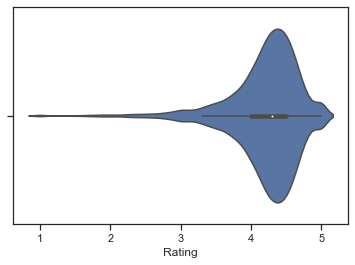

In [107]:
sns.violinplot(x=data["Rating"]);

### 3) Корреляционный анализ

In [108]:
data.corr()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Type_Free,Type_Paid
Category,1.000000,-0.035154,0.000888,0.008860,0.022778,-0.012920,-0.105935,-0.023258,0.023258
Rating,-0.035154,1.000000,0.068133,-0.018149,0.051337,-0.021919,0.019800,-0.039592,0.039592
Reviews,0.000888,0.068133,1.000000,0.019671,0.641605,-0.009824,0.070484,0.043244,-0.043244
Size,0.008860,-0.018149,0.019671,1.000000,0.008248,0.018469,-0.008447,-0.046003,0.046003
Installs,0.022778,0.051337,0.641605,0.008248,1.000000,-0.011895,0.053305,0.053049,-0.053049
Price,-0.012920,-0.021919,-0.009824,0.018469,-0.011895,1.000000,-0.014099,-0.223344,0.223344
Content Rating,-0.105935,0.019800,0.070484,-0.008447,0.053305,-0.014099,1.000000,0.046644,-0.046644
Type_Free,-0.023258,-0.039592,0.043244,-0.046003,0.053049,-0.223344,0.046644,1.000000,-1.000000
Type_Paid,0.023258,0.039592,-0.043244,0.046003,-0.053049,0.223344,-0.046644,-1.000000,1.000000


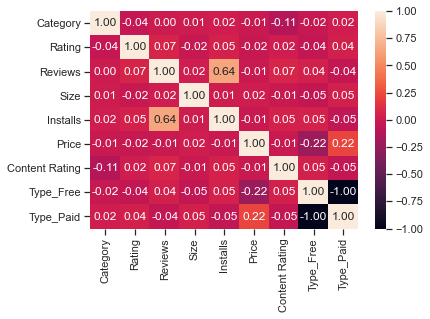

In [110]:
sns.heatmap(data.corr(), annot=True, fmt=".2f");

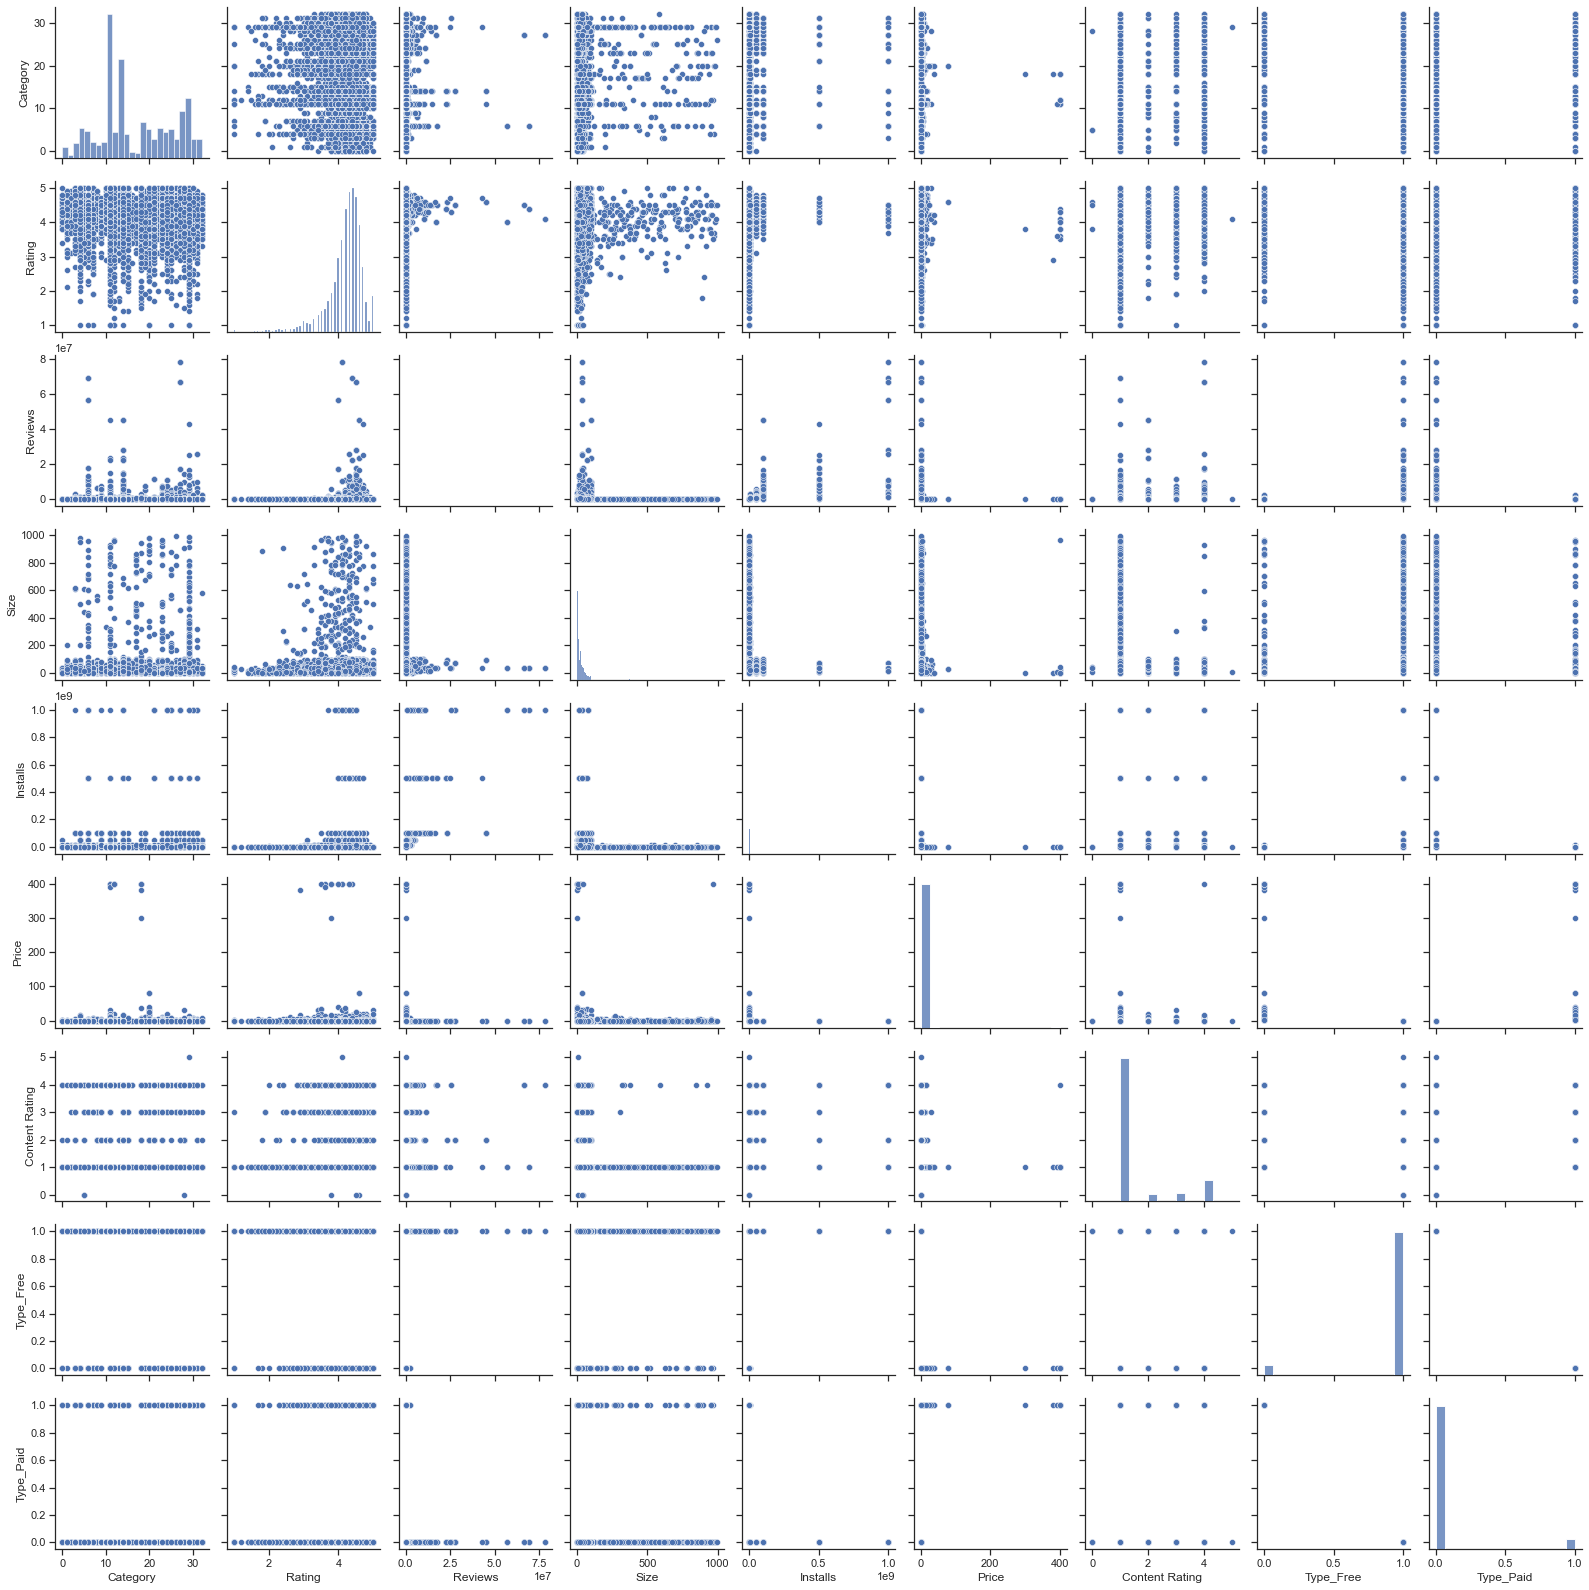

In [111]:
sns.pairplot(data)

<b>Выводы</b>: 
- Между собой хорошо коррелируют признаки Reviews и Installs (0,64);
- Слабо коррелируют между собой признаки Raiting и Reviews (0,07), а так же Reviews и Content Raiting (0,07);
- Линейно зависимых признаков с высоким коэффициентом корреляции не обнаружено.

В этом наборе данных существует всего одна сильная кореляция между Reviews и Installs. Большинство параметров не коререлируют между собой, а значит построить хорошую модель будет проблематино.